In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [10]:
#univeriate impution and multivariate impution(Multiple columns)
#Today we will discusss all about univariate analysis and in that we will discuss the numerical calues

In [25]:
df=sns.load_dataset("titanic")
df.head(4)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


In [26]:
df.isnull().mean()

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [28]:
df=df[["age","fare","survived","embarked"]]

In [29]:
df.isnull().mean()

age         0.198653
fare        0.000000
survived    0.000000
embarked    0.002245
dtype: float64

In [30]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888     True
889    False
890    False
Length: 891, dtype: bool

In [ ]:
#To replcae the data with the mean if the distribution is simple but if distribution is skewed used median.it is the simple technique.
#When to use when data is missing at random and the missing data is less then 5%.

In [40]:
x=df[["age","fare","embarked"]]
y=df[["survived"]]

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)

In [46]:
x_test.sample(4)

,age,fare,embarked
220,16.0,8.0500,S
189,36.0,7.8958,S
33,66.0,10.5000,S
489,9.0,15.9000,S


In [48]:
x_train.isnull().mean()

age         0.202247
fare        0.000000
embarked    0.002809
dtype: float64

In [52]:
mean_age=x_train["age"].mean()
median_age=x_train["age"].median()

In [58]:
embarked_mode=x_train["embarked"].mode()

In [61]:
x_train["mean_age"]=x_train["age"].fillna(mean_age)
x_train["median_age"]=x_train["age"].fillna(median_age)
x_train["embaraked_mode"]=x_train["embarked"].fillna(embarked_mode)

In [62]:
x_train.sample(5)

,age,fare,embarked,mean_age,median_age,embaraked_mode
733,23.0,13.000,S,23.0,23.0,S
615,24.0,65.000,S,24.0,24.0,S
434,50.0,55.900,S,50.0,50.0,S
842,30.0,31.000,C,30.0,30.0,C
875,15.0,7.225,C,15.0,15.0,C


In [72]:
#Now check the varianc of the data becauae it shrink.
print("The variance of the orignal data is:",x_train["age"].var())
print("The variance of the new impute data is:",x_train["mean_age"].var())
print("The variance of the orignal data is:",x_train["median_age"].var())

The variance of the orignal data is: 211.9388097573093
The variance of the new impute data is: 169.01449385709475
The variance of the orignal data is: 169.38647237156087


<Axes: ylabel='Density'>

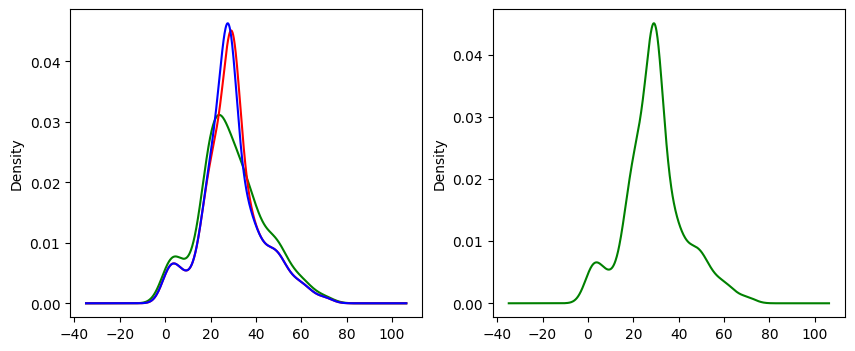

In [77]:
plt.figure(figsize=(10,4))
plt.subplot(121)
x_train["age"].plot(kind='kde',color="green")
x_train["mean_age"].plot(kind='kde',color="red")
x_train["median_age"].plot(kind='kde',color="blue")
plt.subplot(122)
x_train["mean_age"].plot(kind='kde',color="green")

In [122]:
x_train.sample(5)

,age,fare
502,NaN,7.6292
154,NaN,7.3125
756,28.0,7.7958
639,NaN,16.1000
268,58.0,153.4625


In [116]:
from sklearn.impute import SimpleImputer

In [118]:
s1=SimpleImputer(strategy="mean")

In [128]:
x_train["age"]=s1.fit_transform(x_train[['age']])

In [130]:
df=pd.DataFrame(x_train)

In [131]:
df.isnull().mean()

age     0.0
fare    0.0
dtype: float64